<a href="https://colab.research.google.com/github/SebastienBienfait/L2C-Data-managment/blob/main/Data_Exploration_use_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###TO DO list:

* average repeats a day: song_total/song_unique
* most played song(s) and its artist(s)
* most played artist(s) and their top song(s)
* pie chart of genre per day
* average publish year per day
* bar chart/histogram of years

all of the above per DJ.

Importing my data from GitHub:

In [121]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('mode.chained_assignment',None)


url="https://raw.githubusercontent.com/SebastienBienfait/L2C-Data-managment/main/Datasets/kmfm_songs_2022-04-22.csv"

read = lambda x: pd.read_csv(x)
##Month: April
df_song_21 = read("https://raw.githubusercontent.com/SebastienBienfait/L2C-Data-managment/main/Datasets/kmfm_songs_2022-04-21.csv") #thur
df_song_22 = read("https://raw.githubusercontent.com/SebastienBienfait/L2C-Data-managment/main/Datasets/kmfm_songs_2022-04-22.csv") #fri
df_song_23 = read("https://raw.githubusercontent.com/SebastienBienfait/L2C-Data-managment/main/Datasets/kmfm_songs_2022-04-23.csv") #sat
df_song_24 = read("https://raw.githubusercontent.com/SebastienBienfait/L2C-Data-managment/main/Datasets/kmfm_songs_2022-04-24.csv") #sun
df_song_25 = read("https://raw.githubusercontent.com/SebastienBienfait/L2C-Data-managment/main/Datasets/kmfm_songs_2022-04-25.csv") #mon
df_song_26 = read("https://raw.githubusercontent.com/SebastienBienfait/L2C-Data-managment/main/Datasets/kmfm_songs_2022-04-26.csv") #tue
df_song_27 = read("https://raw.githubusercontent.com/SebastienBienfait/L2C-Data-managment/main/Datasets/kmfm_songs_2022-04-27.csv") #wed

#Cleaning the datasets
---

###Cleaning functions:

In [122]:
def add_column_count(df):                   # I have added a "Count" column to each DF as this gives me a univeral column with no null rows.
  ones = np.zeros([len(df),1],dtype="int")  # This can be called indipendent of any DF.groupby("") affects on a DF
  ones.fill(1)
  df["count"] = ones
  return df

def add_column_hour(df):                                               #This cleans up the ["time_played_at"] column into a columns of integer hours which is more usefull
  arr_temp = df["time_played_at"].str.split(":").str.get(0)     # to the data itself, this also drops the minuets part of the information as that was deemed useless.
  df["time_played_at"] = arr_temp.to_numpy(dtype = "int8")
  df.rename(columns={"time_played_at":"hour"},inplace=True)
  return df

def add_DJs(df):                                                #Using the new ["hour"] column we can update the DJ names as some were to easily extracted from the website
  if df["hour"] <= 6 or df["hour"] > 21 and pd.isnull(df["dj_name"]) == True: #From 4am-6am and 10pm-12pm on weekdays there are no specific DJs, just a section called  "kmfm Non Stop"
    return "kmfm NonStop"
  elif df["hour"] == 10:                                        #From 10-11am Pop Anthems is a timeslot devoted to "Songs from way back"
    return "Pop Anthems"
  elif df["hour"] == 13:                                        #Every day there is a Lunchtime requests section were the DJ splayed listeners requests
    return "Requests"
  else:
    return df["dj_name"]

def drop_column(df,column_name): #This drops any unused column by name
  if column_name in df.keys():
    df.drop(column_name,axis=1,inplace=True)
  return df
  

def comment_out1():
  add_column_count(df_song_21)
  add_column_count(df_song_22)
  add_column_count(df_song_23)
  add_column_count(df_song_24)
  add_column_count(df_song_25)
  add_column_count(df_song_26)
  add_column_count(df_song_27)
def comment_out2():
  add_hour(df_song_21)
  add_hour(df_song_22)
  add_hour(df_song_23)
  add_hour(df_song_24)
  add_hour(df_song_25)
  add_hour(df_song_26)
  add_hour(df_song_27)
def comment_out3():
  df_song_21["dj_name"] = df_song_21.apply(add_DJs, axis = 1)
  df_song_22["dj_name"] = df_song_22.apply(add_DJs, axis = 1)
  df_song_23["dj_name"] = df_song_23.apply(add_DJs, axis = 1)
  df_song_24["dj_name"] = df_song_24.apply(add_DJs, axis = 1)
  df_song_25["dj_name"] = df_song_25.apply(add_DJs, axis = 1)
  df_song_26["dj_name"] = df_song_26.apply(add_DJs, axis = 1)
  df_song_27["dj_name"] = df_song_27.apply(add_DJs, axis = 1)
def comment_out4():
  drop_column(df_song_21,"Unnamed: 0")
  drop_column(df_song_22,"Unnamed: 0")
  drop_column(df_song_23,"Unnamed: 0")
  drop_column(df_song_24,"Unnamed: 0")
  drop_column(df_song_25,"Unnamed: 0")
  drop_column(df_song_26,"Unnamed: 0")
  drop_column(df_song_27,"Unnamed: 0")


###Application of cleaning funtions

In [123]:
list_of_DFs = [df_song_21, df_song_22, df_song_23, df_song_24, df_song_25, df_song_26, df_song_27] #this list allows for a for loop iteration on each df in turn when applying all the cleaning funtions.

def add_count(df_list):
  for df in df_list:
    add_column_count(df)


def add_hour(df_list):
    for df in df_list:
      add_column_hour(df)

def apply_DJs(df_list):
  for df in df_list:
    df["dj_name"] = df.apply(add_DJs, axis = 1)


def drop_Unamed(df_list):
  for df in df_list:
    drop_column(df, "Unnamed: 0")

add_count(list_of_DFs)
add_hour(list_of_DFs)
apply_DJs(list_of_DFs)
drop_Unamed(list_of_DFs)


##Combining after cleaning:

In [124]:
df_combined = pd.concat([df_song_21, df_song_22, df_song_23, df_song_24, df_song_25, df_song_26, df_song_27], ignore_index=True)
display(df_combined)

def test_null(df):
  display(df.info())

  for i in df.columns:
    if df[i].isnull().values.any() == True:
      print(i,"has",df[i].isnull().values.sum() ," null values")
  return df
test_null(df_combined)

,song_name,artist_name,song_genre,publish_year,hour,dj_name,count
0,Black Magic,Little Mix,Pop,2015.0,4,kmfm NonStop,1
1,Light Switch,Charlie Puth,Pop,2022.0,4,kmfm NonStop,1
2,Finesse,"Bruno Mars, Cardi B",R&B/Soul,2018.0,4,kmfm NonStop,1
3,Go,Cat Burns,Singer/Songwriter,2020.0,4,kmfm NonStop,1
4,One Kiss,Calvin Harris / Dua Lipa,Dance,2018.0,4,kmfm NonStop,1
...,...,...,...,...,...,...,...
1755,Time To Groove,Majestic / Nonô,Dance,2022.0,23,kmfm NonStop,1
1756,My Universe,Coldplay / Bts,Pop,2021.0,23,kmfm NonStop,1
1757,If You Really Love Me (How Will I Know),David Guetta / John Newman,Dance,2021.0,23,kmfm NonStop,1
1758,California Gurls,"Katy Perry, Snoop Dogg",Pop,2010.0,23,kmfm NonStop,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1760 entries, 0 to 1759
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   song_name     1760 non-null   object 
 1   artist_name   1760 non-null   object 
 2   song_genre    1521 non-null   object 
 3   publish_year  1521 non-null   float64
 4   hour          1760 non-null   int8   
 5   dj_name       1722 non-null   object 
 6   count         1760 non-null   int64  
dtypes: float64(1), int64(1), int8(1), object(4)
memory usage: 84.3+ KB


None

song_genre has 239  null values
publish_year has 239  null values
dj_name has 38  null values


,song_name,artist_name,song_genre,publish_year,hour,dj_name,count
0,Black Magic,Little Mix,Pop,2015.0,4,kmfm NonStop,1
1,Light Switch,Charlie Puth,Pop,2022.0,4,kmfm NonStop,1
2,Finesse,"Bruno Mars, Cardi B",R&B/Soul,2018.0,4,kmfm NonStop,1
3,Go,Cat Burns,Singer/Songwriter,2020.0,4,kmfm NonStop,1
4,One Kiss,Calvin Harris / Dua Lipa,Dance,2018.0,4,kmfm NonStop,1
...,...,...,...,...,...,...,...
1755,Time To Groove,Majestic / Nonô,Dance,2022.0,23,kmfm NonStop,1
1756,My Universe,Coldplay / Bts,Pop,2021.0,23,kmfm NonStop,1
1757,If You Really Love Me (How Will I Know),David Guetta / John Newman,Dance,2021.0,23,kmfm NonStop,1
1758,California Gurls,"Katy Perry, Snoop Dogg",Pop,2010.0,23,kmfm NonStop,1


#Start of Data Explortion
---

###For each song with multiple artists, separte rows are created for each artist indivually.

In [125]:
def duplicate_artist_rows(df):

  df_inclued_collab = pd.DataFrame([]) #empty df to be appended to, which will be returned by the funtion

  for i in range(len(df)): #loops through the dataframe by row
    row = df.loc[i] # sets each row in turn as a series


    artist_name = row[1]                            ##
    artist_name = artist_name.replace(", ", " / ")  ## sets each seperator to " / "
    artist_name = artist_name.replace(" & ", " / ") ## then splits on " / " and returns an artist list
    artist_list = artist_name.split(" / ")          ##

    df_hold_dupe = pd.DataFrame([]) #temp df to hold rows as they are duplicated

    for artist in artist_list: # loops through each artist in artist_list
      row.update({"artist_name":artist}) # sets the index:"artist_name" of the row Series to each artist in turn
      df_store = pd.DataFrame([row])     
      df_hold_dupe = pd.concat([df_hold_dupe, df_store]) # appends each duplicated row to the temp df

    df_inclued_collab = pd.concat([df_inclued_collab, df_hold_dupe]) #appends the set of duplicated rows to the final df

  return df_inclued_collab

##Calculates the average ammout each on has been played per day:

In [126]:

def plural(length): #return based on multiple artists/songs or not. I might clean this up later and move into individual funtions as the string logic is to specic.
  if length>1:
    return "s were ", "were"
  else:
    return " was ", "was"


def averages(df,title):
  df_groupSong = df.groupby("song_name").count()
  total_unique_songs = len(df_groupSong.index)
  total_songs_played = df_groupSong["count"].sum()
  av_times_played = round(total_songs_played/total_unique_songs,2)
  output_string = "Each song was played an average of \"" + str(av_times_played) + "\" times" #returns the (number_of_songs_played / number_of_unique_songs)

  series_Year = df.groupby("publish_year").count()["count"]
  arr_year = df["publish_year"].dropna().to_numpy("int32")
  av_year = int(np.floor(arr_year.mean()))
  year_string = "Each song had an average publication date of " + str(av_year)+"\n " #returns the average year of publications per database
  return av_times_played, output_string, av_year, year_string




##Most played artist:

In [127]:
def most_played_artist(df,title):
  df_all_artists = duplicate_artist_rows(df) #creates a new database with each artist in a collaboration having their own row, allowing all collabortions to be counted in artist totals

  df_group_artist = df_all_artists.groupby("artist_name").count()
  series_group_artist = df_group_artist["count"].sort_values(ascending = False)

  max_played = series_group_artist.max()

  top_artist_list = list(df_group_artist[df_group_artist["count"] == max_played].index)#creates a list of artist names that have a count eaqual to that of the max count

  test_plural = plural(len(top_artist_list))

  artist_string = "" 


  for artist in top_artist_list:      #this adds the all the artist in the most played list into one string
    artist_string += artist + " and "

  output_string = "The most played artist" + test_plural[0] + artist_string + "had songs played " + str(max_played) + " times.\n" #concatinating the final text output

  return top_artist_list, output_string, max_played

most_played_artist(df_song_21," ")

(['Ed Sheeran', 'Tom Grennan'],
 'The most played artists were Ed Sheeran and Tom Grennan and had songs played 10 times.\n',
 10)

##Most played song:

In [128]:
def most_played_song(df, title):
  #print("Most played song, ",title,"\n")

  if averages(df,title)[0] == 1:              #If there are no repeats then every song played is equally the "Most played song", this prevents that from occuring, returning an empty list
    return [], "No songs were repeated.", 0
  else:    
    df_groupby_song = df.groupby("song_name").count()
    series_group_song = df_groupby_song["count"].sort_values(ascending = False)

    max_played = series_group_song.max()

    top_song_list = list(df_groupby_song[df_groupby_song["count"] == max_played].index) #creates a list of song names that have a count eaqual to that of the max count
    
    artist_name_list = []
    for song in top_song_list:                                        #
      artist_name = df["artist_name"][df["song_name"]==song].iloc[0]  #This adds the artist name of each song into a new list
      artist_name_list.append(artist_name)                            #

    both = list(zip(top_song_list,artist_name_list))                  #Creats a list a tuples of each song and its artist.

    test_plural = plural(len(both)) #returns the plural components of the string if more than one song was top

    string = "The most played song" + test_plural[0]

    for song, artist in both:                       #this adds the all the songs and their artist in the most played list into one string
      string += song + " by " + artist + " and "    #

    output_string = "\n" + string + test_plural[1] + " played a total of " + str(max_played) + " times.\n" #concatinates the final output string
    return both, output_string, max_played

Bar chart of publication year:

In [129]:
def year_info(df,title):
  series_Year = df.groupby("publish_year").count()["count"]

  x = series_Year.index.to_numpy("int16")
  y = series_Year

  plt.figure(1)
  chart = plt.bar(x,y)

  plt.title("Bar chart of year of publication vs number of songs: " + title)
  plt.xlabel("Year of publication")
  plt.ylabel("Number of songs")

  plt.show()

Pie chart of genre:

In [130]:
def genre_info(df,title):
  print("pie chart of genres played, ",title)
  series_Genre = df.groupby("song_genre").count()["count"]

  colour_dict = ({"Pop\u2004":"blue",    # A dictionary to assing colours to the most popular genre types.
                  "Dance\u2004":"gold",
                  "Alternative\u2004":"green",
                  "Hip-Hop/Rap\u2004":"red",
                  "R&B/Soul\u2004":"purple",
                  "Rock\u2004":"yellow",
                  "Other":"grey",         #\u2004 is unicode for " " (a space)
                  }) 
  
  sum = series_Genre.sum()

  other_count = 0
  for genre in series_Genre.index:
    total = series_Genre.loc[genre]
    
    if series_Genre.loc[genre] < np.floor(sum/40): # removes the least popular genre types and adds the to the "Other" catagory
      series_Genre.drop(genre,inplace=True)
      other_count += total
    elif genre not in colour_dict.keys(): # removes any genres that are large enough, but do not have an assigned colour, also adding them to the "Other" catagory
      print(genre," is not in")
      series_Genre.drop(genre,inplace=True)
      other_count += total

  
  app_series = pd.Series({"Other":other_count})
  series_Genre = pd.concat([series_Genre,app_series])
  series_Genre = series_Genre.sort_values(ascending=False)

  labels = series_Genre.index
  colours = [colour_dict[v] for v in labels] #assings colours to the list based on if they are needed per chart

  chart = plt.pie(series_Genre, pctdistance=1.18, labeldistance = 1.2,autopct='%1.1f%%', colors = colours, startangle=90, counterclock=True)
  plt.title("Pie chart for "+title)
  plt.legend(labels,loc=(1.05,0.5))
  plt.show()

#Generating the DJ dataframes.
---

In [142]:
def display_df_info(df,title):
  averages(df,title)
  most_played_song(df,title)
  most_played_artist(df,title)
  year_info(df,title)
  genre_info(df,title)


def df_by_DJ(df,dj):
  df_dj = df.drop(df[df["dj_name"] != dj].index)
  df_dj.reset_index(drop=True,inplace=True)
  return df_dj

df_NonStop = df_by_DJ(df_combined,"kmfm NonStop")
df_GandC = df_by_DJ(df_combined,"Garry and Claire")
df_PopAnthems = df_by_DJ(df_combined,"Pop Anthems")
df_AndyWalker = df_by_DJ(df_combined,"Andy Walker")
df_Requests = df_by_DJ(df_combined,"Requests")
df_RobWills = df_by_DJ(df_combined,"Rob Wills")
df_Numi = df_by_DJ(df_combined,"Numi")
df_EmmaAdam = df_by_DJ(df_combined,"Emma Adam")
df_JackMiles = df_by_DJ(df_combined,"Jack Miles")
df_GarryWilson = df_by_DJ(df_combined,"Garry Wilson")
df_BenPearce = df_by_DJ(df_combined,"Ben Pearce")

### Defining a dictionary per DataFrame, as well as a function to input information into that dictionary

In [ ]:
dict_combined = ({})
dict_21 = ({})
dict_22 = ({})
dict_23 = ({})
dict_24 = ({})
dict_25 = ({})
dict_26 = ({})
dict_27 = ({})

dict_NonStop = ({})
dict_GandC = ({})
dict_PopAnthems = ({})
dict_AndyWalker = ({})
dict_Requests = ({})
dict_RobWills = ({})
dict_Numi = ({})
dict_EmmaAdam = ({})
dict_JackMiles = ({})
dict_GarryWilson = ({})
dict_BenPearce = ({})

def create_dict(dict_,df,title):
  av, av_string, av_year, year_string = averages(df,title)
  top_song_list, song_string, times_song_played = most_played_song(df,title)
  top_artist_list, artist_string, times_artist_played = most_played_artist(df,title)

  dict_["Av times played per song"] = av
  dict_["Av year of publication"] = av_year
  dict_["Most played song"] = top_song_list
  dict_["Song times"] = times_song_played
  dict_["Most played artist"] = top_artist_list
  dict_["Artist times"] = times_artist_played


#List containing of Dataframes
---
## By day and by DJ, including their titles and dictionaries

In [133]:
list_of_DFs = [(df_combined,"Over the week.", dict_combined), (df_song_21,"On the 21st.", dict_21), (df_song_22,"On the 22nd.", dict_22), (df_song_23,"On the 23rd.", dict_23), (df_song_24,"On the 24th.", dict_24), 
               (df_song_25,"On the 25th.", dict_25), (df_song_26,"On the 26th.", dict_26), (df_song_27,"On the 27th.", dict_27),
               (df_NonStop, "By KMFM NonStop.", dict_NonStop), (df_GandC, "By Gary and Claire.", dict_GandC), (df_PopAnthems, "By Pop Anthems.", dict_PopAnthems), (df_AndyWalker, "By Andy Walker.", dict_AndyWalker), 
               (df_Requests, "By listener request.", dict_Requests), (df_RobWills, "By Rob Wills.", dict_RobWills), (df_Numi, "By Numi.", dict_Numi), (df_EmmaAdam, "By Emma Adam.", dict_EmmaAdam), 
               (df_JackMiles, "By Jack Miles.", dict_JackMiles), (df_GarryWilson, "By Gary Wilson.", dict_GarryWilson), (df_BenPearce, "By Ben Pearce.", dict_BenPearce)]


###Displays the average ages and averge times each song has been played per dataframe.

In [134]:
def show_averages():
  for DF in list_of_DFs:
    df = DF[0]
    title = DF[1]
    av, av_string, year, year_string = averages(df,title)
    print(title,"\n",av_string)
    print(year_string)
show_averages()


Over the week. 
 Each song was played an average of "3.22" times
Each song had an average publication date of 2017
 
On the 21st. 
 Each song was played an average of "1.44" times
Each song had an average publication date of 2018
 
On the 22nd. 
 Each song was played an average of "1.34" times
Each song had an average publication date of 2017
 
On the 23rd. 
 Each song was played an average of "1.44" times
Each song had an average publication date of 2017
 
On the 24th. 
 Each song was played an average of "1.33" times
Each song had an average publication date of 2016
 
On the 25th. 
 Each song was played an average of "1.42" times
Each song had an average publication date of 2018
 
On the 26th. 
 Each song was played an average of "1.39" times
Each song had an average publication date of 2018
 
On the 27th. 
 Each song was played an average of "1.42" times
Each song had an average publication date of 2018
 
By KMFM NonStop. 
 Each song was played an average of "1.96" times
Each song h

###Displays the most played songs and how many times they were played per dataframe and by which artist each song was by.

In [135]:
def show_most_played_song():
  for DF in list_of_DFs:
    df = DF[0]
    title = DF[1]
    top_song_list, string, times_played = most_played_song(df,title)
    print(title,"\n",string)
show_most_played_song()

Over the week. 
 
The most played song was Where Did You Go? by Jax Jones, Mnek and was played a total of 32 times.

On the 21st. 
 
The most played song was Run by Becky Hill & Galantis and was played a total of 6 times.

On the 22nd. 
 
The most played songs were As It Was by Harry Styles and House On Fire by Mimi Webb and Run by Becky Hill & Galantis and Time To Groove by Majestic / Nonô and Where Did You Go? by Jax Jones, Mnek and she's all i wanna be by Tate Mcrae and were played a total of 4 times.

On the 23rd. 
 
The most played songs were Good Luck by Mabel & Jax Jones and What Would You Do? by Joel Corry, David Guetta & Bryson Tiller and Where Did You Go? by Jax Jones, Mnek and were played a total of 5 times.

On the 24th. 
 
The most played song was Good Luck by Mabel & Jax Jones and was played a total of 5 times.

On the 25th. 
 
The most played songs were Bam Bam by Camila Cabello / Ed Sheeran and Light Switch by Charlie Puth and Run by Becky Hill & Galantis and were playe

###Displays the most played artists and how many times they were played per dataframe

In [136]:
def show_most_played_artist():
  for DF in list_of_DFs:
    df = DF[0]
    title = DF[1]
    top_artist_list, string, times_played = most_played_artist(df,title)
    print(title,"\n",string)
show_most_played_artist()

Over the week. 
 The most played artists were David Guetta and Jax Jones and had songs played 63 times.

On the 21st. 
 The most played artists were Ed Sheeran and Tom Grennan and had songs played 10 times.

On the 22nd. 
 The most played artist was David Guetta and had songs played 10 times.

On the 23rd. 
 The most played artist was Jax Jones and had songs played 12 times.

On the 24th. 
 The most played artist was Ed Sheeran and had songs played 10 times.

On the 25th. 
 The most played artists were Becky Hill and Ed Sheeran and had songs played 10 times.

On the 26th. 
 The most played artist was Ed Sheeran and had songs played 10 times.

On the 27th. 
 The most played artist was Jax Jones and had songs played 10 times.

By KMFM NonStop. 
 The most played artist was Ed Sheeran and had songs played 16 times.

By Gary and Claire. 
 The most played artists were Ed Sheeran and Joel Corry and had songs played 6 times.

By Pop Anthems. 
 The most played artists were Britney Spears and Ju

###Displays a bar chart of age of songs played per dataframe

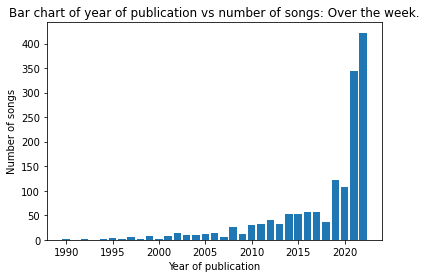

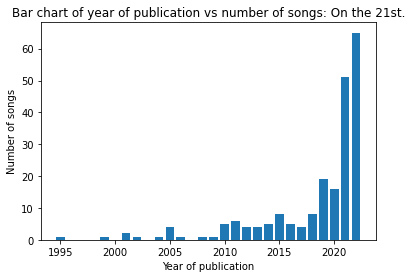

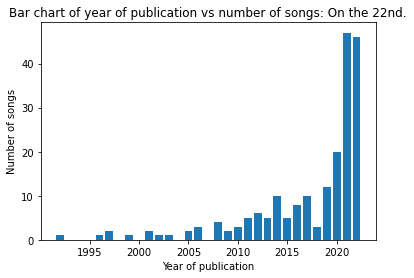

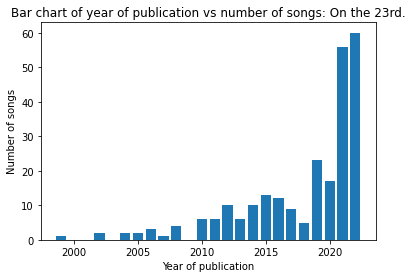

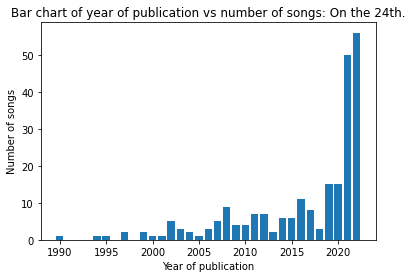

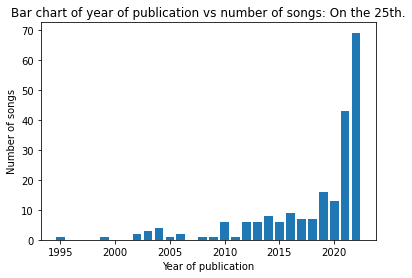

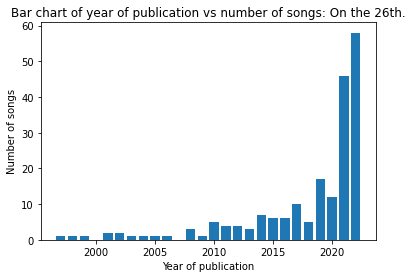

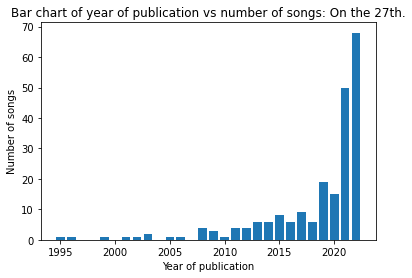

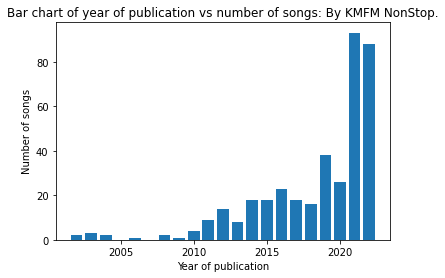

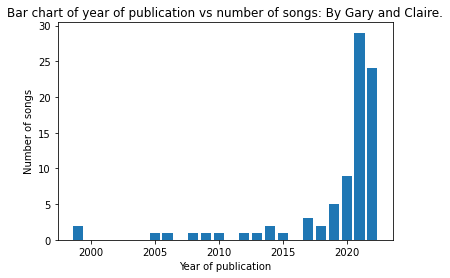

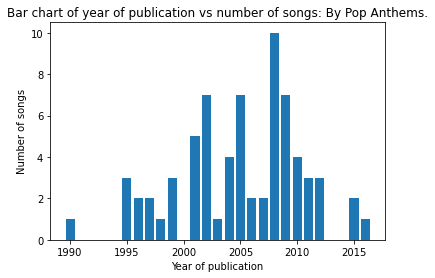

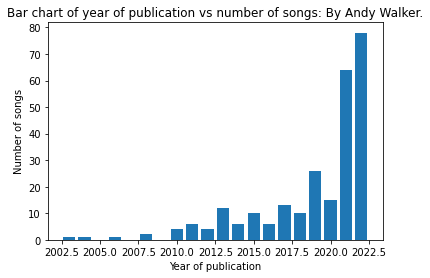

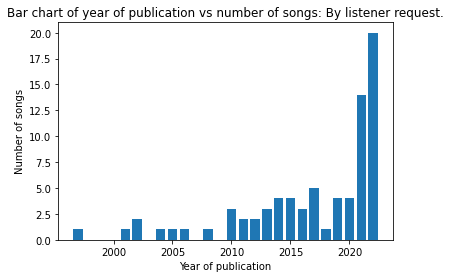

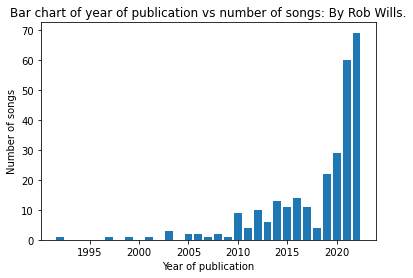

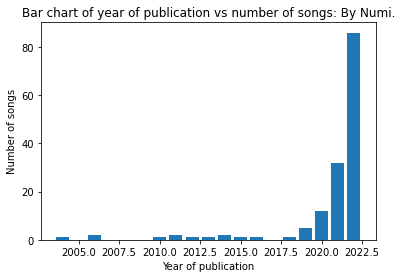

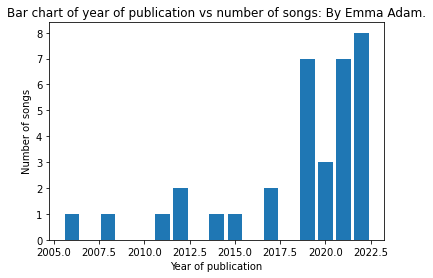

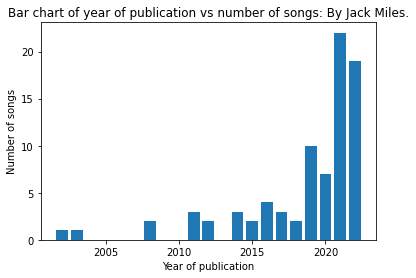

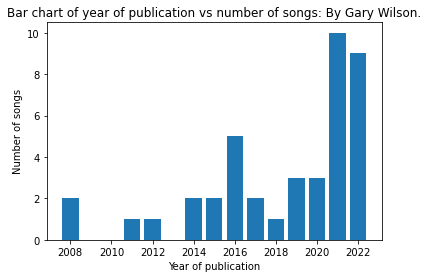

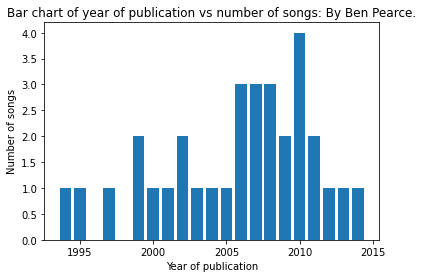

In [137]:
def display_bar():
  for DF in list_of_DFs:
    df = DF[0]
    title = DF[1]
    chart = year_info(df,title)

    chart
    plt.show()
display_bar()

###Displays a pie chart of genres played per dataframe

pie chart of genres played,  Over the week.


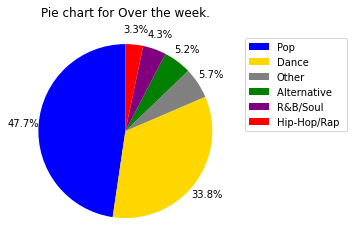

pie chart of genres played,  On the 21st.


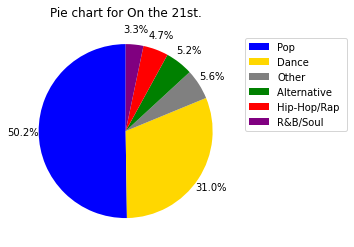

pie chart of genres played,  On the 22nd.


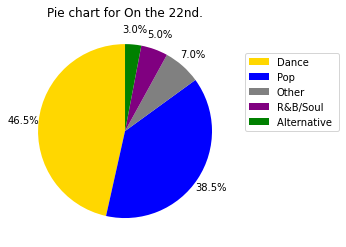

pie chart of genres played,  On the 23rd.


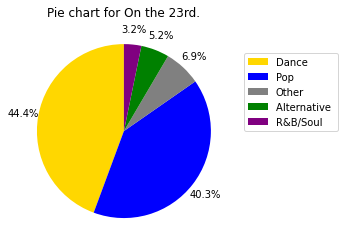

pie chart of genres played,  On the 24th.
Singer/Songwriter   is not in


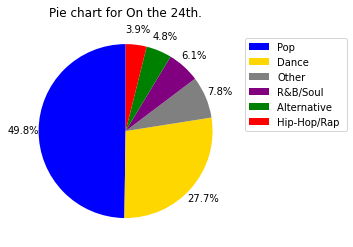

pie chart of genres played,  On the 25th.


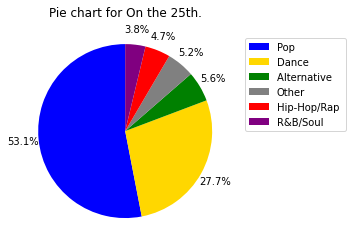

pie chart of genres played,  On the 26th.
Singer/Songwriter   is not in


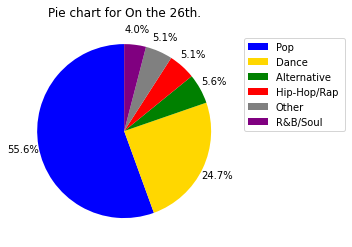

pie chart of genres played,  On the 27th.
Singer/Songwriter   is not in


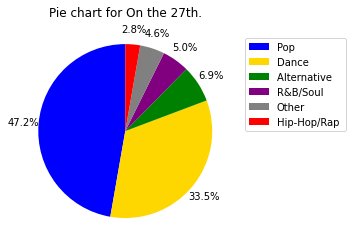

pie chart of genres played,  By KMFM NonStop.
Singer/Songwriter   is not in


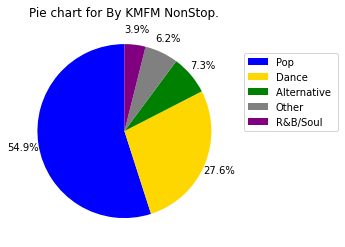

pie chart of genres played,  By Gary and Claire.
Singer/Songwriter   is not in


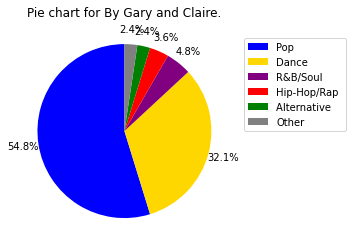

pie chart of genres played,  By Pop Anthems.
Electronic   is not in
Fitness & Workout   is not in
Pop/Rock   is not in
Soundtrack   is not in


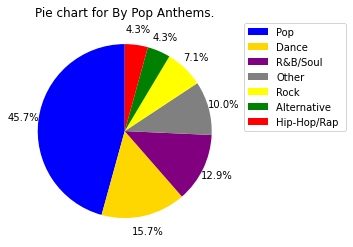

pie chart of genres played,  By Andy Walker.
Singer/Songwriter   is not in


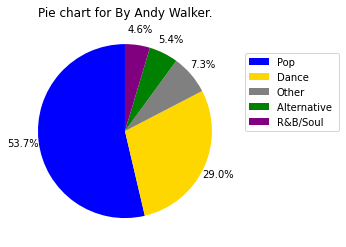

pie chart of genres played,  By listener request.
Country   is not in
House   is not in
Karaoke   is not in
Singer/Songwriter   is not in


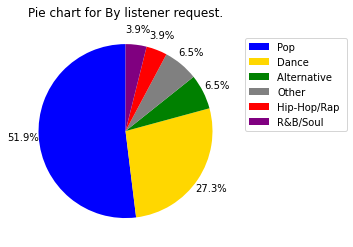

pie chart of genres played,  By Rob Wills.


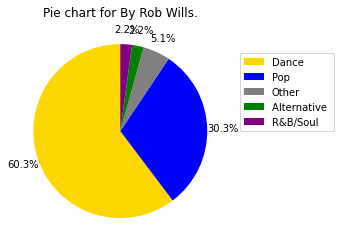

pie chart of genres played,  By Numi.
Singer/Songwriter   is not in


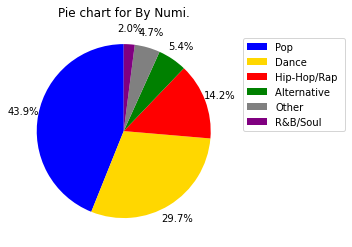

pie chart of genres played,  By Emma Adam.
Singer/Songwriter   is not in


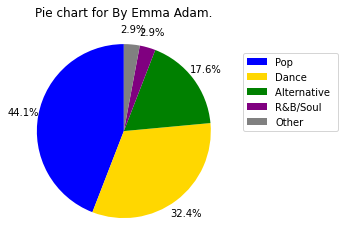

pie chart of genres played,  By Jack Miles.


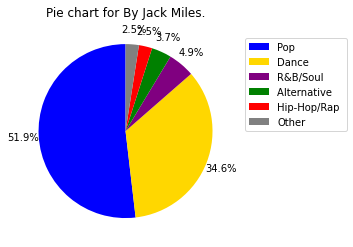

pie chart of genres played,  By Gary Wilson.
Karaoke   is not in


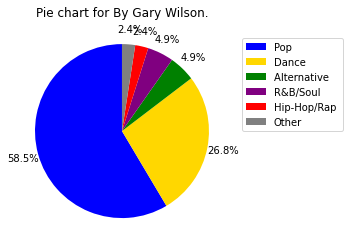

pie chart of genres played,  By Ben Pearce.
Karaoke   is not in
Latin   is not in
Reggae   is not in


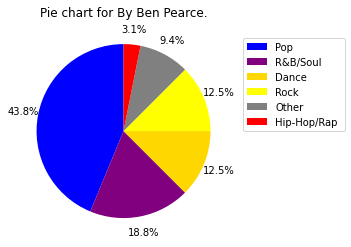

In [138]:
def display_pie():
  for DF in list_of_DFs:
    df = DF[0]
    title = DF[1]
    chart = genre_info(df,title)

    chart
    plt.show()
display_pie()

###Combines the important information extracted per day/dj dataframe into indvidual dictionaries.

In [139]:
def create_dict(dict_,df,title):
  av, av_string, av_year, year_string = averages(df,title)
  top_song_list, song_string, times_song_played = most_played_song(df,title)
  top_artist_list, artist_string, times_artist_played = most_played_artist(df,title)

  dict_["Av times played per song"] = av
  dict_["Av year of publication"] = av_year
  dict_["Most played song"] = top_song_list
  dict_["Song times"] = times_song_played
  dict_["Most played artist"] = top_artist_list
  dict_["Artist times"] = times_artist_played
#create_dict(dict_21,df_song_21,"On the 21st.")
#print(dict_21)

def into_dict():
  dict_list = []
  for DF in list_of_DFs:
    df = DF[0]
    title = DF[1]
    dict_ = DF[2]
    create_dict(dict_ ,df , title)
    dict_list.append(dict_)
  return dict_list
dict_list = into_dict()

###Prints average information per dictionary type

In [140]:
def find_days_averages(dict_list):
  dict_list_day = dict_list[1:8]
  #print(dict_list[1]["Av times played per song"])
  av_av_times_arr = np.array([])
  av_av_year_arr = np.array([])
  times_song_played_arr = np.array([])

  for dict_ in dict_list_day:
    av_av_times_arr = np.append(av_av_times_arr, dict_["Av times played per song"])
    av_av_year_arr = np.append(av_av_year_arr, dict_["Av year of publication"])
    times_song_played_arr = np.append(times_song_played_arr, dict_["Song times"])

  av_av_times = round(av_av_times_arr.mean(),2)
  av_av_year = np.floor(av_av_year_arr.mean())
  times_top_song_played = round(times_song_played_arr.mean(),2)

  print("Per Day: average times each song played, average song publication year and average times the most played song was played.")
  print(av_av_times, int(av_av_year), times_top_song_played)
find_days_averages(dict_list)

def find_dj_averages(dict_list):
  dict_list_day = dict_list[9:]
  #print(dict_list[1]["Av times played per song"])
  av_av_times_arr = np.array([])
  av_av_year_arr = np.array([])
  times_song_played_arr = np.array([])

  for dict_ in dict_list_day:
    av_av_times_arr = np.append(av_av_times_arr, dict_["Av times played per song"])
    av_av_year_arr = np.append(av_av_year_arr, dict_["Av year of publication"])
    times_song_played_arr = np.append(times_song_played_arr, dict_["Song times"])

  av_av_times = round(av_av_times_arr.mean(),2)
  av_av_year = np.floor(av_av_year_arr.mean())
  times_top_song_played = round(times_song_played_arr.mean(),2)

  print("Per DJ: average times each song played, average song publication year and average times the most played song was played.")
  print(av_av_times, int(av_av_year), times_top_song_played)
find_dj_averages(dict_list)

Per Day: average times each song played, average song publication year and average times the most played song was played.
1.4 2017 5.43
Per DJ: average times each song played, average song publication year and average times the most played song was played.
1.28 2015 3.0


,song_name,artist_name,song_genre,publish_year,hour,dj_name,count
0,Black Magic,Little Mix,Pop,2015.0,4,kmfm NonStop,1
1,Light Switch,Charlie Puth,Pop,2022.0,4,kmfm NonStop,1
2,Finesse,"Bruno Mars, Cardi B",R&B/Soul,2018.0,4,kmfm NonStop,1
3,Go,Cat Burns,Singer/Songwriter,2020.0,4,kmfm NonStop,1
4,One Kiss,Calvin Harris / Dua Lipa,Dance,2018.0,4,kmfm NonStop,1
...,...,...,...,...,...,...,...
433,Time To Groove,Majestic / Nonô,Dance,2022.0,23,kmfm NonStop,1
434,My Universe,Coldplay / Bts,Pop,2021.0,23,kmfm NonStop,1
435,If You Really Love Me (How Will I Know),David Guetta / John Newman,Dance,2021.0,23,kmfm NonStop,1
436,California Gurls,"Katy Perry, Snoop Dogg",Pop,2010.0,23,kmfm NonStop,1


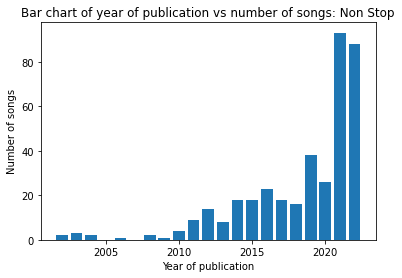

pie chart of genres played,  Non Stop
Singer/Songwriter   is not in


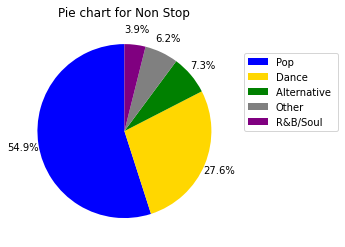

In [143]:
df_NonStop = df_by_DJ(df_combined,"kmfm NonStop")
display(df_NonStop)
df_NonStop_info = display_df_info(df_NonStop,"Non Stop")


,song_name,artist_name,song_genre,publish_year,hour,dj_name,count
0,In Da Club,50 Cent,NaN,NaN,10,Pop Anthems,1
1,Oops I Did It Again ...,Britney Spears,Pop,2004.0,10,Pop Anthems,1
2,Year Three Thousand,Busted,Rock,2002.0,10,Pop Anthems,1
3,Rock Dj,Robbie Williams,Pop,2010.0,10,Pop Anthems,1
4,Two Can Play That Game,Bobby Brown,R&B/Soul,1995.0,10,Pop Anthems,1
...,...,...,...,...,...,...,...
85,The Weekend,Michael Gray,NaN,NaN,10,Pop Anthems,1
86,Wannabe,Spice Girls,Pop,1996.0,10,Pop Anthems,1
87,Love In This Club,Usher / Young Jeezy,R&B/Soul,2008.0,10,Pop Anthems,1
88,Music,Madonna,Pop,2009.0,10,Pop Anthems,1


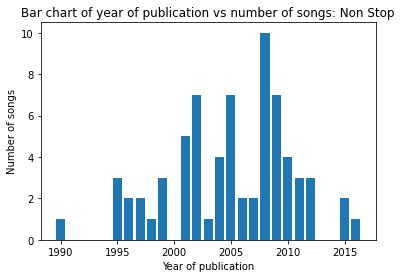

pie chart of genres played,  Non Stop
Electronic   is not in
Fitness & Workout   is not in
Pop/Rock   is not in
Soundtrack   is not in


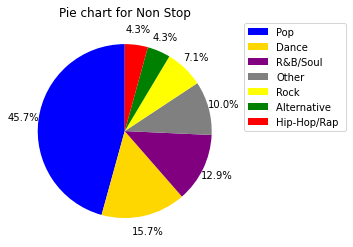

In [144]:
df_GandC = df_by_DJ(df_combined,"Pop Anthems")
display(df_GandC)
df_GandC_info = display_df_info(df_GandC,"Non Stop")

,song_name,artist_name,song_genre,publish_year,hour,dj_name,count
0,In Da Club,50 Cent,NaN,NaN,10,Pop Anthems,1
1,Oops I Did It Again ...,Britney Spears,Pop,2004.0,10,Pop Anthems,1
2,Year Three Thousand,Busted,Rock,2002.0,10,Pop Anthems,1
3,Rock Dj,Robbie Williams,Pop,2010.0,10,Pop Anthems,1
4,Two Can Play That Game,Bobby Brown,R&B/Soul,1995.0,10,Pop Anthems,1
...,...,...,...,...,...,...,...
85,The Weekend,Michael Gray,NaN,NaN,10,Pop Anthems,1
86,Wannabe,Spice Girls,Pop,1996.0,10,Pop Anthems,1
87,Love In This Club,Usher / Young Jeezy,R&B/Soul,2008.0,10,Pop Anthems,1
88,Music,Madonna,Pop,2009.0,10,Pop Anthems,1


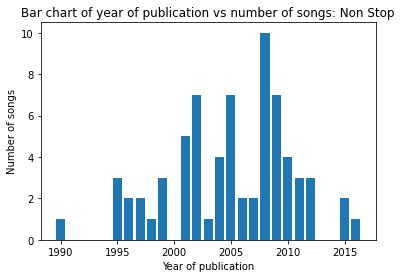

pie chart of genres played,  Non Stop
Electronic   is not in
Fitness & Workout   is not in
Pop/Rock   is not in
Soundtrack   is not in


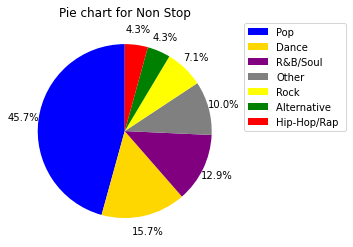

In [145]:
df_PopAnthems = df_by_DJ(df_combined,"Pop Anthems")
display(df_PopAnthems)
df_PopAnthems_info = display_df_info(df_PopAnthems,"Non Stop")

,song_name,artist_name,song_genre,publish_year,hour,dj_name,count
0,Heartbreak Anthem,"Galantis, Little Mix",Dance,2021.0,11,Andy Walker,1
1,House On Fire,Mimi Webb,Pop,2022.0,11,Andy Walker,1
2,So Sick,Jubel,Pop,2022.0,11,Andy Walker,1
3,Flowers,Nathan Dawe,Dance,2019.0,11,Andy Walker,1
4,Cold Heart (Pnau Remix),Elton John & Dua Lipa,Pop,2021.0,11,Andy Walker,1
...,...,...,...,...,...,...,...
294,Supalonely,Benee / Gus Dapperton,Alternative,2019.0,15,Andy Walker,1
295,Seventeen Going Under,Sam Fender,Singer/Songwriter,2021.0,15,Andy Walker,1
296,Looking For Me,Paul Woolford / Diplo / Kareen Lomax,Dance,2020.0,15,Andy Walker,1
297,Bam Bam,Camila Cabello / Ed Sheeran,Pop,2022.0,15,Andy Walker,1


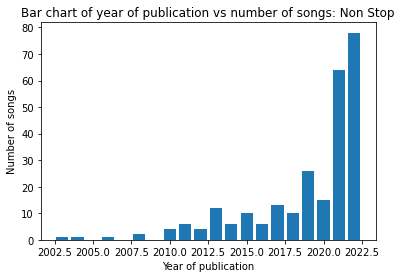

pie chart of genres played,  Non Stop
Singer/Songwriter   is not in


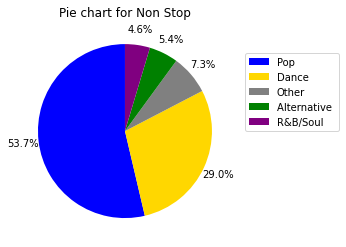

In [146]:
df_AndyWalker = df_by_DJ(df_combined,"Andy Walker")
display(df_AndyWalker)
df_AndyWalker_info = display_df_info(df_AndyWalker,"Non Stop")

,song_name,artist_name,song_genre,publish_year,hour,dj_name,count
0,Melody,Sigala,Dance,2022.0,13,Requests,1
1,Light Switch,Charlie Puth,Pop,2022.0,13,Requests,1
2,Let The Sun Shine,Labrinth,Pop,2010.0,13,Requests,1
3,Blinding Lights,The Weeknd,R&B/Soul,2019.0,13,Requests,1
4,The Sound,The 1975,Alternative,2016.0,13,Requests,1
...,...,...,...,...,...,...,...
83,Heroes,Alesso / Tove Lo,NaN,NaN,13,Requests,1
84,Anywhere Away From Here,Rag N Bone Man / Pink,Pop,2021.0,13,Requests,1
85,Time To Groove,Majestic / Nonô,Dance,2022.0,13,Requests,1
86,Let Me Love You,Ne-Yo,R&B/Soul,2012.0,13,Requests,1


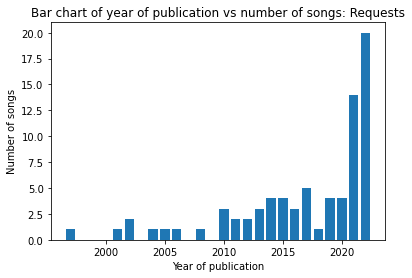

pie chart of genres played,  Requests
Country   is not in
House   is not in
Karaoke   is not in
Singer/Songwriter   is not in


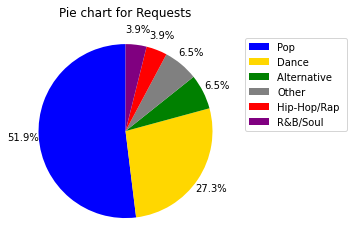

In [147]:
df_Requests = df_by_DJ(df_combined,"Requests")
display(df_Requests)
df_Requests_info = display_df_info(df_Requests,"Requests")

,song_name,artist_name,song_genre,publish_year,hour,dj_name,count
0,Beg For You,Charli Xcx / Rina Sawayama,Pop,2022.0,16,Rob Wills,1
1,Tell Me Something Good,Ewan Mcvicar,NaN,NaN,16,Rob Wills,1
2,Remind Me,Tom Grennan,Alternative,2022.0,16,Rob Wills,1
3,One Night,Griff,Pop,2021.0,16,Rob Wills,1
4,Problem,"Ariana Grande, Iggy Azalea",Pop,2014.0,16,Rob Wills,1
...,...,...,...,...,...,...,...
310,My Heart Goes (La Di Da),Becky Hill / Topic,Dance,2021.0,18,Rob Wills,1
311,More Than Friends,"James Hype, Kelli-Leigh",Dance,2017.0,18,Rob Wills,1
312,Montero (Call Me By Your Name),Lil Nas X,Pop,2021.0,18,Rob Wills,1
313,Shake It Off,Taylor Swift,Pop,2014.0,18,Rob Wills,1


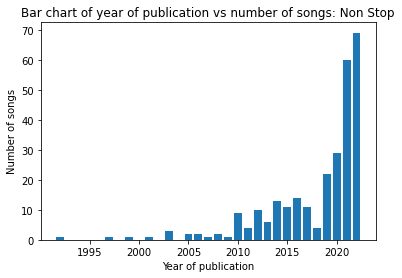

pie chart of genres played,  Non Stop


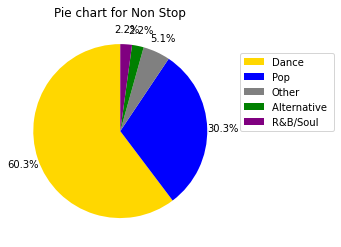

In [148]:
df_RobWills = df_by_DJ(df_combined,"Rob Wills")
display(df_RobWills)
df_RobWills_info = display_df_info(df_RobWills,"Non Stop")

,song_name,artist_name,song_genre,publish_year,hour,dj_name,count
0,Big Energy,Latto / Mariah Carey / Dj Khaled,Hip-Hop/Rap,2022.0,19,Numi,1
1,Better Days,Neiked / Mae Muller / Polo G,Pop,2021.0,19,Numi,1
2,Make Me Feel Good,Belters Only & Jazzy,Dance,2021.0,19,Numi,1
3,What Would You Do?,"Joel Corry, David Guetta & Bryson Tiller",Dance,2022.0,19,Numi,1
4,Dynamite,BTS,NaN,NaN,19,Numi,1
...,...,...,...,...,...,...,...
171,Run,Becky Hill & Galantis,Dance,2022.0,21,Numi,1
172,Heat Waves,Glass Animals,Pop,2020.0,21,Numi,1
173,Flowers,Lauren Spencer Smith,Pop,2022.0,21,Numi,1
174,What Would You Do?,"Joel Corry, David Guetta & Bryson Tiller",Dance,2022.0,21,Numi,1


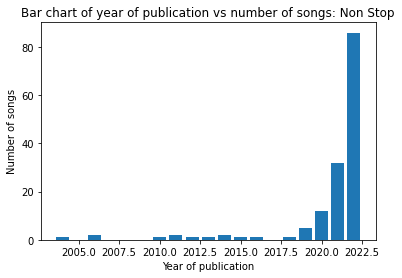

pie chart of genres played,  Non Stop
Singer/Songwriter   is not in


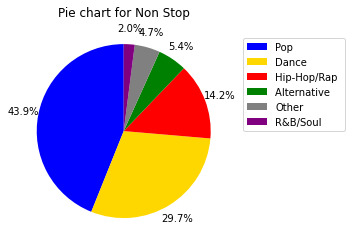

In [149]:
df_Numi = df_by_DJ(df_combined,"Numi")
display(df_Numi)
df_Numi_info = display_df_info(df_Numi,"Non Stop")

,song_name,artist_name,song_genre,publish_year,hour,dj_name,count
0,Don't Play,Anne Marie & Ksi & Digital Farm Animals,Pop,2021.0,11,Emma Adam,1
1,Run,Becky Hill & Galantis,Dance,2022.0,11,Emma Adam,1
2,Human,Rag 'n' Bone Man,Alternative,2017.0,11,Emma Adam,1
3,This Is Real,Jax Jones & Ella Henderson,Dance,2019.0,11,Emma Adam,1
4,Halo,Beyonce,Pop,2008.0,11,Emma Adam,1
5,Seventeen Going Under,Sam Fender,Singer/Songwriter,2021.0,11,Emma Adam,1
6,Light Switch,Charlie Puth,Pop,2022.0,11,Emma Adam,1
7,About Time,Lizzo,NaN,NaN,11,Emma Adam,1
8,Good Without,Mimi Webb,Pop,2021.0,11,Emma Adam,1
9,When The Bassline Drops,"Craig David, Big Narstie",NaN,NaN,11,Emma Adam,1


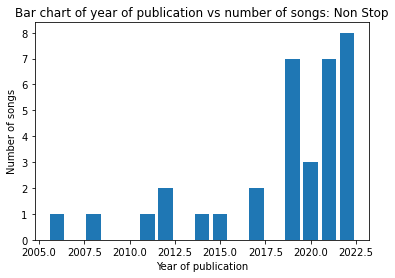

pie chart of genres played,  Non Stop
Singer/Songwriter   is not in


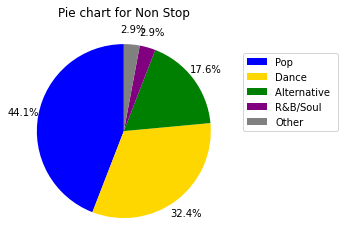

In [150]:
df_EmmaAdam = df_by_DJ(df_combined,"Emma Adam")
display(df_EmmaAdam)
df_EmmaAdam_info = display_df_info(df_EmmaAdam,"Non Stop")

,song_name,artist_name,song_genre,publish_year,hour,dj_name,count
0,Want To Want Me,Jason Derulo,Pop,2015.0,15,Jack Miles,1
1,Run,Becky Hill & Galantis,Dance,2022.0,15,Jack Miles,1
2,Juice,Lizzo,Pop,2019.0,15,Jack Miles,1
3,Breaking Me,"Topic, A7S",Dance,2019.0,15,Jack Miles,1
4,These Days,Rudimental / Jess Glynne / Macklemore / Dan Ca...,Dance,2018.0,15,Jack Miles,1
...,...,...,...,...,...,...,...
86,We Are Never Ever Getting Back Together,Taylor Swift,NaN,NaN,15,Jack Miles,1
87,Piece Of Your Heart,Meduza / Goodboys,Dance,2019.0,15,Jack Miles,1
88,Where Did You Go?,"Jax Jones, Mnek",Dance,2022.0,15,Jack Miles,1
89,Here With Me,Marshmello / Chvrches,Dance,2019.0,15,Jack Miles,1


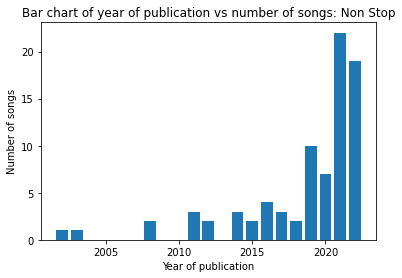

pie chart of genres played,  Non Stop


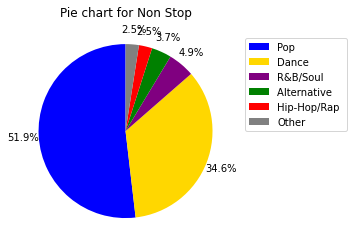

In [151]:
df_JackMiles = df_by_DJ(df_combined,"Jack Miles")
display(df_JackMiles)
df_JackMiles_info = display_df_info(df_JackMiles,"Non Stop")

,song_name,artist_name,song_genre,publish_year,hour,dj_name,count
0,Get Out My Head,Shane Codd,Dance,2020.0,7,Garry Wilson,1
1,Can't Stop The Feeling,Justin Timberlake,Pop,2016.0,7,Garry Wilson,1
2,she's all i wanna be,Tate Mcrae,Pop,2022.0,7,Garry Wilson,1
3,Bad Habits,Ed Sheeran,Pop,2021.0,7,Garry Wilson,1
4,Havana,Camila Cabello,NaN,NaN,7,Garry Wilson,1
5,Piece Of Your Heart,Meduza / Goodboys,Dance,2019.0,7,Garry Wilson,1
6,House On Fire,Mimi Webb,Pop,2022.0,7,Garry Wilson,1
7,Feel It Still,"Portugal, The Man",Alternative,2017.0,7,Garry Wilson,1
8,Umbrella,Rihanna,R&B/Soul,2008.0,7,Garry Wilson,1
9,ABC,Gayle,Pop,2021.0,7,Garry Wilson,1


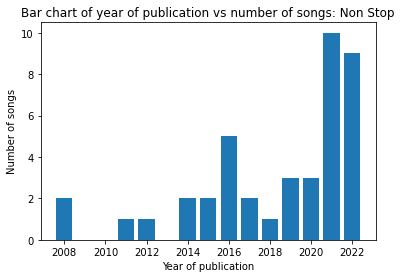

pie chart of genres played,  Non Stop
Karaoke   is not in


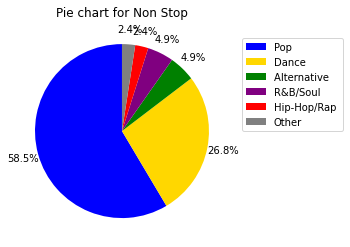

In [152]:
df_GarryWilson = df_by_DJ(df_combined,"Garry Wilson")
display(df_GarryWilson)
df_GarryWilson_info = display_df_info(df_GarryWilson,"Non Stop")

,song_name,artist_name,song_genre,publish_year,hour,dj_name,count
0,The Girls,Calvin Harris,Dance,2007.0,19,Ben Pearce,1
1,Scandalous,Misteeq,NaN,NaN,19,Ben Pearce,1
2,Fantasy,Mariah Carey,Pop,1995.0,19,Ben Pearce,1
3,Telephone,Lady Gaga & Beyonce,Pop,2010.0,19,Ben Pearce,1
4,No Letting Go,Wayne Wonder,NaN,NaN,19,Ben Pearce,1
5,What Makes You Beautiful,One Direction,Pop,2011.0,19,Ben Pearce,1
6,There You Go,Pink,Pop,2010.0,19,Ben Pearce,1
7,Teenage Dirtbag,Wheatus,Rock,2013.0,19,Ben Pearce,1
8,Gotta Get Thru This,Daniel Bedingfield,Rock,2002.0,19,Ben Pearce,1
9,"Love, Sex, Magic",Ciara & Justin Timberlake,R&B/Soul,2009.0,19,Ben Pearce,1


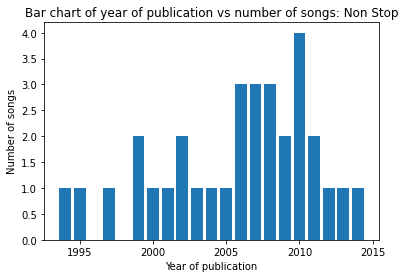

pie chart of genres played,  Non Stop
Karaoke   is not in
Latin   is not in
Reggae   is not in


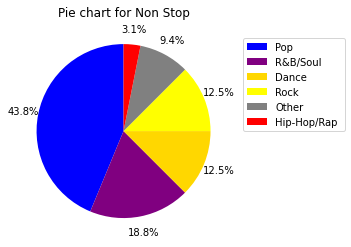

In [153]:
df_BenPearce = df_by_DJ(df_combined,"Ben Pearce")
display(df_BenPearce)
df_BenPearce_info = display_df_info(df_BenPearce,"Non Stop")

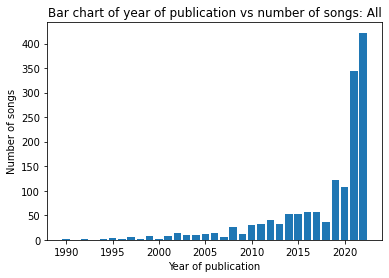

pie chart of genres played,  All


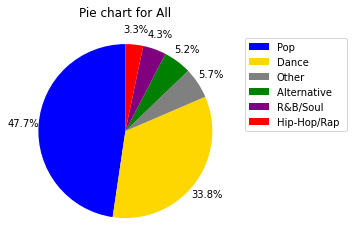

In [154]:
display_df_info(df_combined,"All")

#Testing area:
---

In [155]:
def testing_return():
  x = "variable information"

  
  return x, print("print statment")

if testing_return ==  "variable information":
  print("True")
else:
  print("False")
def comment_out2():
  print("\n")
  variable = testing_return()
  print("\n")
  str_stament = testing_return()
  print(variable)
  #print(str_stament)
  str_stament

False


In [156]:
df_test = pd.DataFrame([[1,2],[2,4],[3,9],[4,16]], columns=["num","square"],index=[1,2,3,4])
row_add = pd.Series([5,25], index=["num","square"])  #,columns=df_test.keys())
df_add = pd.DataFrame([[5,25],[4,16]],columns=["num","square"],index=[5,4])

display(df_test,row_add,df_add)
#df_test = pd.concat([df_test,df_add],axis =0,join="inner",ignore_index=False) #, index = 1
#df_test.concat([df_add],axis =0,join="inner",ignore_index=False)

df_attempt = pd.concat([df_test,row_add.T],axis = 1,ignore_index=False)

display(df_attempt)
list1 = [1,2,3,4,5,6]
list2 = [6,5,4,3,2,1]
#print(df_group_song.size)
"""
counting = df_test.index.value_counts()[2]
test_drop = df_test.drop(4)
display(test_drop)

if 100 not in set_year:
  print("yes")
else:
  print("no")
"""

,num,square
1,1,2
2,2,4
3,3,9
4,4,16


num        5
square    25
dtype: int64

,num,square
5,5,25
4,4,16


,num,square,0
1,1.0,2.0,NaN
2,2.0,4.0,NaN
3,3.0,9.0,NaN
4,4.0,16.0,NaN
num,NaN,NaN,5.0
square,NaN,NaN,25.0


'\ncounting = df_test.index.value_counts()[2]\ntest_drop = df_test.drop(4)\ndisplay(test_drop)\n\nif 100 not in set_year:\n  print("yes")\nelse:\n  print("no")\n'

* Songs played more than 4 times a day,
* average repeated songs played per day
* pie chart by genre, per day and overall
* inclue date played in the df
* most played song, most played artist ect.
* possibly get song time info to add
* average song age (int(year))
* songs per dj?
* get better dj info -lots of string stuff. Machine learning?






Dustbin:

In [157]:
#### Attempting to update one column based on the condition of another
"""
def add_djs(df):
  split_ = lambda s: int(s.split(":")[0]) #splitting 14:12 ect...
  #if split = None:
  df["temp_column"] = df["time_played_at"].apply(split_)
  display(df.loc[df['time_played_at'].apply(split_)<6,"dj_name"])
  df.loc[df['time_played_at'].apply(split_) < 6 , 'dj_name'] = "kmfm NonStop" #
  #df.loc[df['time_played_at'].apply(split_) > 21 and 'dj_name' == float("nan"), 'dj_name'] = "kmfm NonStop"

  df.loc[df['time_played_at'].apply(split_) == 10, 'dj_name'] = "Pop Anthems"

  df.loc[df['time_played_at'].apply(split_) == 13 , 'dj_name'] = "Requests"
"""


####
#All this was pointless, you cannont have both int and float in a single pd/np array
####
#formatNumber = lambda x: x if x%1 else int(x)
#df_combined["publish_year"] = df_combined["publish_year"].apply(formatNumber)
#display(df_combined.info())
####


####Possibly useless im not sure.
"""
def change_name(name):
  other_count = 0
  if df_group_song.loc[name, "count"] > 1:
    return name
  else:
    other_count += 1
    return "other" #df_group_song.drop(df_group_song.loc[name])


#df_group_song["updated_name"] = df_group_song.index.map(change_name)
#display(df_group_song)


def other_find(df):
  df.index = df.index.map(change_name)
  other_count = df.index.value_counts()["other"]
  df.drop("other", inplace = True)

  df_temp = pd.DataFrame([[other_count]],index=["other"],columns=["count"])
  #df = pd.concat([df,df_temp],ignore_index=False)
  return df
  """
########
#Testing for the duplication of rows based on the artists of a song
########

"""
def duplicate_rows(input):

  artist_name = input[1]
  artist_name = artist_name.replace(", ", " / ")
  artist_name = artist_name.replace(" & ", " / ")

  artist_list = artist_name.split(" / ")

  df_hold_dupe = pd.DataFrame([])

  for artist in artist_list:
    input.update({"artist_name":artist}) # pd.Series([artist]), index=["artist_name"]
    df_store = pd.DataFrame([input])
    df_hold_dupe = pd.concat([df_hold_dupe, df_store])

  return df_hold_dupe


def copy(df):
  copy_called = "I called copy"

  df_inclued_collab = pd.DataFrame([])
  
  for i in [0,2,4,1759]: #len(df) #range(4)

    row = df.loc[i]


    df_artist_dupes = duplicate_rows(row)
    df_inclued_collab = pd.concat([df_inclued_collab, df_artist_dupes], ignore_index=False) #
  return df_inclued_collab

artist1 = df_combined.iloc[0]
artist2, artist1_index = df_combined.iloc[2], df_combined.index[4]
artist3, artist2_index = df_combined.iloc[4], df_combined.index[2]
artist4, artist3_index = df_combined.iloc[1759], df_combined.index[1759]

#artist21 = 

artist1_ = artist1[1]
artist2_ = artist2[1]
artist3_ = artist3[1]
artist4_ = artist4[1]

df1 = pd.DataFrame([artist1])
df2 = pd.DataFrame([artist2])
df3 = pd.DataFrame([artist3])
df4 = pd.DataFrame([artist4])


#df1.to_csv("testing_dataframe.csv")

print(list(artist1_))
print(list(artist2_))
print(list(artist3_))


df1 = pd.concat([df1,df2,df3,df4])
display(df1)

#df1 = duplicate_artist_rows(df1)
#display(df1)#duplicate_rows(artist1))
#df1 = df1.apply(duplicate_rows,axis=1)
#print(type(df1))
"""

####
#Hugly bloated code, completely replace with a list and a for loop.
####

"""
def show_average_played():
  av_combined = average_repeats(df_combined,"over the week.")
  print("each song was played an average of \"",av_combined,"\" times\n"), 
  av_21 = average_repeats(df_song_21,"on the 21st.")
  print("each song was played an average of \"",av_21,"\" times\n"), 
  av_22 = average_repeats(df_song_22,"on the 22nd.")
  print("each song was played an average of \"",av_22,"\" times\n"), 
  av_23 = average_repeats(df_song_23,"on the 23rd.")
  print("each song was played an average of \"",av_23,"\" times\n"), 
  av_24 = average_repeats(df_song_24,"on the 24th.")
  print("each song was played an average of \"",av_24,"\" times\n"), 
  av_25 = average_repeats(df_song_25,"on the 25th.")
  print("each song was played an average of \"",av_25,"\" times\n"), 
  av_26 = average_repeats(df_song_26,"on the 26th.")
  print("each song was played an average of \"",av_26,"\" times\n"), 
  av_27 = average_repeats(df_song_27,"on the 27th.")
  print("each song was played an average of \"",av_27,"\" times\n"), 

  av_NonStop = average_repeats(df_NonStop, "by KMFM NonStop.")
  print("each song was played an average of \"",av_NonStop,"\" times\n"), 
  av_GandC = average_repeats(df_GandC, "by Gary and Claire.")
  print("each song was played an average of \"",av_GandC,"\" times\n"), 
  av_PopAnthems = average_repeats(df_PopAnthems, "by Pop Anthems.")
  print("each song was played an average of \"",av_PopAnthems,"\" times\n"), 
  av_AndyWalker = average_repeats(df_AndyWalker, "by Andy Walker.")
  print("each song was played an average of \"",av_AndyWalker,"\" times\n"), 
  av_Requests = average_repeats(df_Requests, "by listener request.")
  print("each song was played an average of \"",av_Requests,"\" times\n"), 
  av_RobWills = average_repeats(df_RobWills, "by Rob Wills.")
  print("each song was played an average of \"",av_RobWills,"\" times\n"), 
  av_Numi = average_repeats(df_Numi, "by Numi.")
  print("each song was played an average of \"",av_Numi,"\" times\n"), 
  av_EmmaAdam = average_repeats(df_EmmaAdam, "by EmmaAdam.")
  print("each song was played an average of \"",av_EmmaAdam,"\" times\n"), 
  av_JackMiles = average_repeats(df_JackMiles, "by Jack Miles.")
  print("each song was played an average of \"",av_JackMiles,"\" times\n"), 
  av_GarryWilson = average_repeats(df_GarryWilson, "by Gary Wilson.")
  print("each song was played an average of \"",av_GarryWilson,"\" times\n"), 
  av_BenPearce = average_repeats(df_BenPearce, "by Ben Pearce.")
  print("each song was played an average of \"",av_BenPearce,"\" times\n"), 

show_average_played()
"""

"""
def count_artists(df):
  artist_list = df["artist_name"].to_list()
  print(artist_list)
  new_array = np.array([])
  for artist in artist_list:
    artist = artist.replace(", ", " / ")
    artist = artist.replace(" & ", " / ")
    artist = artist.split(" / ")
    for i in artist:
      np.append(new_array,i)
  print(new_array)
###
"""

'\ndef count_artists(df):\n  artist_list = df["artist_name"].to_list()\n  print(artist_list)\n  new_array = np.array([])\n  for artist in artist_list:\n    artist = artist.replace(", ", " / ")\n    artist = artist.replace(" & ", " / ")\n    artist = artist.split(" / ")\n    for i in artist:\n      np.append(new_array,i)\n  print(new_array)\n###\n'